# Research Paper -- Notebook to reproduce results and figures

Author: YOUR NAME HERE (INSTITUTE), EMAIL  
GitHub repository: https://github.com/svenbuder/template_ojap  
arXiv: YYMM.NNNNN

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Fitting-a-function-to-data" data-toc-modified-id="Fitting-a-function-to-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting a function to data</a></span></li></ul></li></ul></div>

In [1]:
# Preamble
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.table import Table

# Set the seed for reproducibility
np.random.seed(8123)

In [2]:
def format_with_uncertainty(value, uncertainty):
    if uncertainty == 0:
        raise ValueError("Uncertainty cannot be zero.")
    # Calculate the number of significant figures in the uncertainty
    sig_digits = -int(np.floor(np.log10(abs(uncertainty))))+1
    # Format both value and uncertainty to the same number of decimal places
    formatted_value = f"{round(value, sig_digits):.{sig_digits}f}"
    formatted_uncertainty = f"{round(uncertainty, sig_digits):.{sig_digits}f}"
    return formatted_value, formatted_uncertainty

## 2. Data

In [3]:
# Generate x values
x = np.linspace(0, 10, 100)

# Generate y values based on a sinusoidal pattern
y = np.sin(x) + np.random.normal(0, 0.1, size=x.size)  # Adding some noise

## 3. Analysis

### 3.1. Fitting a function to data

In [4]:
# Define the model function that we are going to fit
def model(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * x + phase) + offset

parameter_name = ['amplitude','frequency','phase','offset']
parameter_labels = ['$A$','$\omega$','$\phi$','$\mu$']

# Perform the curve fitting
parameters, parameter_covariance = curve_fit(model, x, y, p0=[1, 1, 0, 0])

# We only report the diagonal entry of the covariance matrix as uncertainty
parameter_uncertainties = np.sqrt(np.diag(parameter_covariance))

In [5]:
# Save data as FITS file
results = Table()
results['x_data'] = x
results['y_data'] = y
results['y_fit'] = model(x, *parameters)
results['y_residuals'] = y - model(x, *parameters)
results.write('data/sin_fit_x_y.fits', overwrite=True)

In [6]:
# Save fitting parameters and their uncertainties in a table in an automated fashion

table_name = 'sin_fit_x_y'

# Setup the table environment
latex_table = [
    [r'\begin{table}'],
    [r'\centering'],
    [r'\caption{Fitting a sin-function (Eq.~\ref{eq:sine}) to randomly, but reproducibly created data.}'],
    [r'\label{tab:'+table_name+'}'],
    [r'\begin{tabular}{ccc}'],
    [r'\hline\hline'],
    [r'Parameter & Value & Uncertainty \\'],
    [r'\hline']    
]

# Now add the rows for each parameter
for index, (parameter, parameter_uncertainty) in enumerate(zip(parameters, parameter_uncertainties)):
    
    # Convert python variables to strings with significant decimal places
    str_parameter, str_parameter_uncertainty = format_with_uncertainty(parameter, parameter_uncertainty)
    
    # Add row to table
    latex_table.append([parameter_labels[index]+' & $'+str_parameter+'$ & $'+str_parameter_uncertainty+r'$ \\'])
    
    # You can also save specific text to use in-line
    with open('tex_text/parameter_'+parameter_name[index]+'.tex', "w") as file:
        file.write(f"{str_parameter} \\pm {str_parameter_uncertainty}")
    
# Close the table environment
latex_table.append([r'\hline\hline'])
latex_table.append([r'\end{tabular}'])
latex_table.append([r'\end{table}'])

np.savetxt('tables/table_'+table_name+'.tex',np.array(latex_table),fmt='%s')

#### Figure 1: Fitting a sine-function

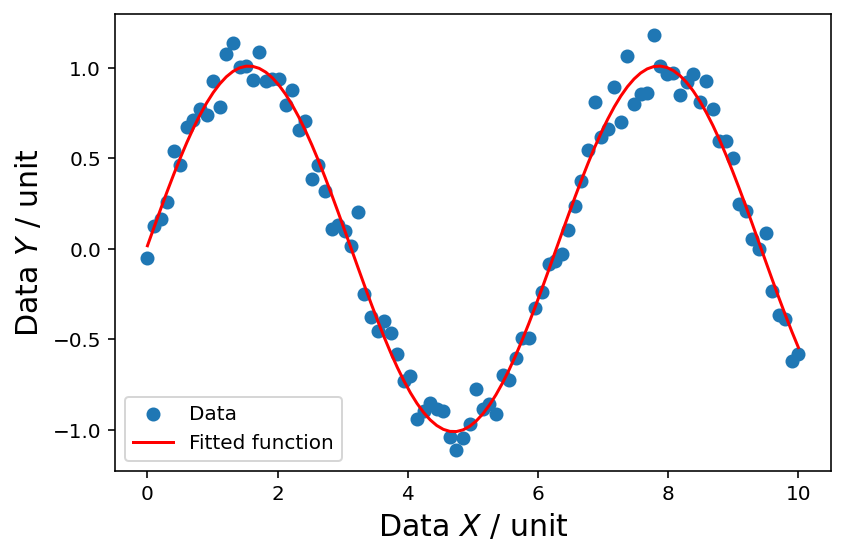

In [7]:
# Plot the data and the fitted curve
f, ax = plt.subplots()
ax.scatter(x, y, label='Data')
ax.plot(x, model(x, *parameters), label='Fitted function', color='red')
ax.set_xlabel('Data $X~/~\mathrm{unit}$',fontsize=15)
ax.set_ylabel('Data $Y~/~\mathrm{unit}$',fontsize=15)
ax.legend()

plt.tight_layout()
plt.savefig('figures/sin_fit_x_y.png',dpi=200,bbox_inches='tight')
plt.show()
plt.close()